# Star-TREX decoding pipeline

### Code to extract and decodes spots, to sort them into cells and group cells into clones

### Load all required data

Load required packages

In [1]:
# Load packages
from IPython import get_ipython
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import sys
import os

sys.path.insert(1, os.path.abspath('..'))

ipython = get_ipython()
ipython.run_line_magic("gui", "qt5")
ipython.run_line_magic("matplotlib", "inline")

matplotlib.rcParams["figure.dpi"] = 150

Define your working directory.

In [46]:
work_dir = "/Users/leonievb/Library/CloudStorage/OneDrive-Personal/Postdoc/Data/02_4_Gene_Test2/OME-TIFF_MaxIP/"
#work_dir = "/Users/leonievb/Library/CloudStorage/OneDrive-Personal/Postdoc/Data/02_4_Gene_Test2/OME-TIFF/"

Load the experiment based on the .json files created with the preprocessing steps.

In [3]:
#Load experiment
from starfish import Experiment
exp = Experiment.from_json(os.path.join(work_dir, "spacetx", "primary", "experiment.json"))
print(exp)

<starfish.Experiment (FOVs=1)>
{
fov_000: <starfish.FieldOfView>
  Primary Image: <slicedimage.TileSet (r: 6, c: 4, z: 1, x: 2048, y: 2048)>
  Auxiliary Images:
    nuclei: <slicedimage.TileSet (r: 6, c: 1, z: 1, x: 2048, y: 2048)>
}


### Run the decoding pipeline

For running the full decoding pipeline, each parameter can be defined in the function call below. However, that is very tedious. Instead use the settings.yaml file (can be found in star-trex/settings.yaml, make sure to adapt the settings to your data) and indicate the path to the file in the function call. If you wish to change some settings quickly, you can still do that in the function call below and it will overwrite the setting in the settings.yaml

In [7]:
from importlib import reload
from src import starfish_wrapper
reload(starfish_wrapper)
from src.starfish_wrapper import run

full_decoded, stack, nuclei, gem, masks, seg = run(exp, settings_path="/Users/leonievb/Library/CloudStorage/OneDrive-Personal/Postdoc/Data/02_4_Gene_Test2/4genepanel_dapi-488-568-657-750/OME-TIFF_MaxIP/settings.yaml")

The pipeline was started at: 2024-06-27 19:28:49.177186
Loads the full nuclei image


100%|██████████| 6/6 [00:00<00:00, 141.93it/s]

Calculates offset between rounds by image registration
...Calculates the offset to anchor round



100%|██████████| 6/6 [00:00<00:00, 266.51it/s]


tile indices: {<Axes.ROUND: 'r'>: 0}
translation: y=0.0, x=0.0, rotation: 0.0, scale: 1.0
tile indices: {<Axes.ROUND: 'r'>: 1}
translation: y=-220.167, x=-29.564, rotation: 0.0, scale: 1.0
tile indices: {<Axes.ROUND: 'r'>: 2}
translation: y=-241.87, x=-28.105, rotation: 0.0, scale: 1.0
tile indices: {<Axes.ROUND: 'r'>: 3}
translation: y=-141.858, x=14.732, rotation: 0.0, scale: 1.0
tile indices: {<Axes.ROUND: 'r'>: 4}
translation: y=-61.121, x=-8.523, rotation: 0.0, scale: 1.0
tile indices: {<Axes.ROUND: 'r'>: 5}
translation: y=-2.193, x=3.743, rotation: 0.0, scale: 1.0
...Finished!
Loads the full signal image


100%|██████████| 24/24 [00:00<00:00, 200.26it/s]


Transforms the image according to calculated offset
...Transforms images based on provided/calculated offset
Equalises pixel intensities across channels and rounds
Calculating reference distribution...


100%|██████████| 24/24 [00:00<00:00, 1230.57it/s]


Removes background from images with White Top-Hat filter


100%|██████████| 24/24 [00:00<00:00, 666.02it/s]


Performs deconvolution on images


100%|██████████| 24/24 [00:00<00:00, 614.91it/s]


Starts processing tile 1 of 1 at 2024-06-27 19:29:32.459786
...Available Memory before loading the tile: 3.82 GB bytes
...Searches for spots
...Decodes spots
...Corrects pixels to full image values
...Tile (0, 2048),(0, 2048) is finished! It took 0:00:36.211699 to run
Spot detection is finished!
...Calculates the offset to anchor round


100%|██████████| 6/6 [00:00<00:00, 310.19it/s]


tile indices: {<Axes.ROUND: 'r'>: 0}
translation: y=0.0, x=0.0, rotation: 0.0, scale: 1.0
tile indices: {<Axes.ROUND: 'r'>: 1}
translation: y=-220.167, x=-29.564, rotation: 0.0, scale: 1.0
tile indices: {<Axes.ROUND: 'r'>: 2}
translation: y=-241.87, x=-28.105, rotation: 0.0, scale: 1.0
tile indices: {<Axes.ROUND: 'r'>: 3}
translation: y=-141.858, x=14.732, rotation: 0.0, scale: 1.0
tile indices: {<Axes.ROUND: 'r'>: 4}
translation: y=-61.121, x=-8.523, rotation: 0.0, scale: 1.0
tile indices: {<Axes.ROUND: 'r'>: 5}
translation: y=-2.193, x=3.743, rotation: 0.0, scale: 1.0
...Transforms images based on provided/calculated offset
Segments cells


100%|██████████| 1/1 [00:00<00:00, 146.77it/s]


Creates gene expression matrix
The pipeline is finished at 2024-06-27 19:30:23.583571.
It took 0 day(s), 0 hour(s), 1 minute(s) and 34 second(s).


### Visualise and save results

First, let's have a look at the found spots and their features. Not all spots have beend decoded, as you can observe in the "passes_thresholds" and "target" columns. While looking at the data, we also save them for further inspection in the /output folder.

In [8]:
from src.starfish_wrapper import df_creator, gene_counter
#Transforms the final spot decoded xarray into a readable dataframe
spots_df = df_creator(full_decoded)
spots_df.to_csv(os.path.join(work_dir, "output/spots.csv"))
spots_df

,radius,z,y,x,spot_id,features,xc,yc,zc,target,distance,passes_thresholds
0,1.0,0,2046,1871,0,0,214.740361,234.825643,0.057358,nan,0.0,False
1,1.0,0,2046,1157,1,1,132.792409,234.825643,0.057358,nan,0.0,False
2,1.0,0,2046,706,2,2,81.029767,234.825643,0.057358,nan,0.0,False
3,1.0,0,2046,658,3,3,75.520661,234.825643,0.057358,nan,0.0,False
4,2.0,0,2045,1652,4,4,189.605065,234.710870,0.057358,nan,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
14733,1.0,0,1,1564,14733,14733,179.505037,0.114773,0.057358,nan,0.0,False
14734,1.0,0,1,1368,14734,14734,157.009521,0.114773,0.057358,nan,0.0,False
14735,1.0,0,1,609,14735,14735,69.896782,0.114773,0.057358,nan,0.0,False
14736,1.0,0,1,529,14736,14736,60.714939,0.114773,0.057358,nan,0.0,False


Now let's check how many spots actually passed the threshold and got decoded.

In [9]:
len(spots_df[spots_df["passes_thresholds"] == True])


2576

Let's also see which genes have been detected how often.

In [10]:
gene_counter(spots_df)

Malat1    834
Actb      771
Calm1     532
Snap25    439
dtype: int64

For visualising the spot results in tissuumaps, use the following functions to store spots and images in the right format.

In [228]:

from importlib import reload
from src import tissuumapper
reload(tissuumapper)
from src.outputter import tissuumaps_csv, tissuumaps_images
from starfish.types import Axes, Features
import xarray as xr

#The stack needs to be z-projected as tissuumaps cannot handle z planes for now
stack = stack.reduce({Axes.ZPLANE}, func="max")

#Create the folder to store tissuumap data
if not os.path.exists(os.path.join(work_dir, "tissuumaps")):
        os.makedirs(os.path.join(work_dir, "tissuumaps"))

#For saving decoded spots only, uncomment the line below and comment the line two rows under
spot_intensities = full_decoded.loc[full_decoded[Features.PASSES_THRESHOLDS]]
#For saving all found spots, use this line and comment the line above
all_spot_intensities = full_decoded['target'] = xr.where(~full_decoded['passes_thresholds'], 'undefined', full_decoded['target'])


output_tissuumapper = os.path.join(work_dir, "tissuumaps/")
csv_name = tissuumaps_csv(experiment=exp,
                     spot_intensities=spot_intensities,
                     output_name=os.path.join(output_tissuumapper, "spots_tissuumaps.csv"))

image_names = tissuumaps_images(filtered_imgs=stack,
                        output_name=output_tissuumapper, img_type = "primary")

image_names = tissuumaps_images(filtered_imgs=nuclei,
                        output_name=output_tissuumapper, img_type = "nuclei")

100%|██████████| 24/24 [00:00<00:00, 420.57it/s]


For visualising the spot results in napari, use the following function(s):

In [2]:
from importlib import reload
from src import outputter
reload(outputter)
import xarray as xr
from starfish.types import Features
from src.outputter import napari_csv
import seaborn as sns

palette_name = "hsv" #Choose a seaborn palette here: https://seaborn.pydata.org/generated/seaborn.color_palette.html

#Create the folder to store tissuumap data
if not os.path.exists(os.path.join(work_dir, "napari")):
        os.makedirs(os.path.join(work_dir, "napari"))


#For saving decoded spots only, uncomment the line below and comment the line two rows under
spot_intensities = full_decoded.loc[full_decoded[Features.PASSES_THRESHOLDS]]
#For saving all found spots, use this line and comment the line above
all_spot_intensities = full_decoded['target'] = xr.where(~full_decoded['passes_thresholds'], 'undefined', full_decoded['target'])

output_napari = os.path.join(work_dir, "napari/")
csv_name = napari_csv(spot_intensities=spot_intensities, palette_name=palette_name,
                      output_name=os.path.join(output_napari, "decoded_spots_napari.csv"))

csv_name = napari_csv(spot_intensities=all_spot_intensities, palette_name=palette_name,
                      output_name=os.path.join(output_napari, "all_spots_napari.csv"))

ModuleNotFoundError: No module named 'src'

If you have performed cell segmentation, you can now have a look at the gene expression matrix, showing you which detected cell expresses which genes to what level. 

In [19]:
gem_nested = gem.to_dataframe()
gem_nested.to_csv(os.path.join(work_dir, "gem.csv"))
gem_nested

x      y    z          xc         yc        zc  area  \
cells genes                                                              
0     Actb    624.0  400.0  0.0   71.618378  45.909217  0.057358   NaN   
      Malat1  624.0  400.0  0.0   71.618378  45.909217  0.057358   NaN   
1     Actb    767.5  252.5  0.0   88.088309  28.980193  0.057358   NaN   
      Malat1  767.5  252.5  0.0   88.088309  28.980193  0.057358   NaN   
2     Actb    908.5  361.5  0.0  104.271308  41.490455  0.057358   NaN   
      Malat1  908.5  361.5  0.0  104.271308  41.490455  0.057358   NaN   

              number_of_undecoded_spots cell_id  expression_matrix  
cells genes                                                         
0     Actb                          0.0       0                1.0  
      Malat1                        0.0       0               13.0  
1     Actb                          0.0       1                1.0  
      Malat1                        0.0       1                2.0  
2     Actb                          0.0       2                0.0  
      Malat1                        0.0       2                5.0

Now let's see how many spots are found within cells in total. Compare to the number of decoded spots. Does your cell segmentation require adjustments?

In [21]:
gem_nested.expression_matrix.sum()

22.0

Look at the cell segmentation mask to evaluate the performance of cell segmentation (works only if you performed cell segmentation within the star-trex pipeline or imported segmented cells as ROIs).

In [22]:
seg.show()

NameError: name 'seg' is not defined

100%|██████████| 1/1 [00:00<00:00, 242.07it/s]


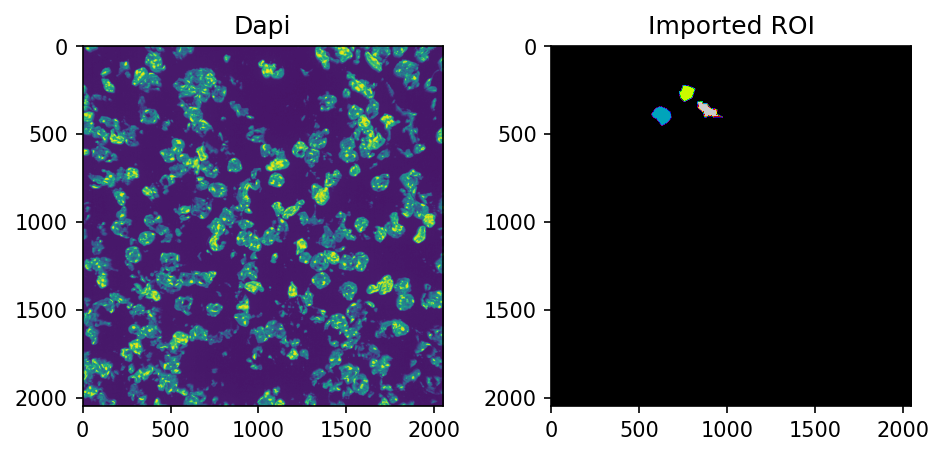

: 

In [25]:
from starfish.types import Axes
f, (ax1, ax2) = plt.subplots(ncols=2)
dapi = nuclei.reduce(dims=[Axes.ROUND], func="max")

ax1.imshow(dapi.xarray.values.squeeze())
ax1.set_title("Dapi")
ax2.imshow(masks.to_label_image().xarray.values.squeeze(), cmap=plt.cm.nipy_spectral)
ax2.set_title("Imported ROI")
f.tight_layout()

### Clone calling

Now let's finally move on to the last step. Clone calling is the assignemnts of cells to clones based on their overlapping cloneIDs. 

The output of this pipeline will give you a good idea of how the clone calling process went. Have a look especally at the clone size histogram.

In [68]:
from src import clone_caller
reload(clone_caller)
from src.clone_caller import clone_caller
from src.outputter import seurat_outputter

jaccard_threshold = 1

seurat_outputter(gem_nested, work_dir)
clones = clone_caller(gem_nested, work_dir, jaccard_threshold)


153 cells were found
Added 0 edges to the clone graph
Removing 0 bridges from the graph
CloneGraph.clones() called. 15 connected components (clones) found
Detected 15 clones
Clone size histogram
 size count
     1     1
    2     2
    3     5
    5     1
    6     1
    8     1
    9     2
   16     1
   80     1
No. of cells in clones:  153


If you want to inspect the clones themselves, use the clones list below

In [67]:
clones

[('Malat1',
  [Cell(cell_id=0, counts={'Calm1': 5, 'Snap25': 4, 'Malat1': 2, 'Actb': 2}),
   Cell(cell_id=6, counts={'Calm1': 6, 'Snap25': 3, 'Malat1': 1, 'Actb': 11}),
   Cell(cell_id=8, counts={'Calm1': 5, 'Snap25': 2, 'Malat1': 8, 'Actb': 2}),
   Cell(cell_id=9, counts={'Calm1': 3, 'Snap25': 2, 'Malat1': 3, 'Actb': 11}),
   Cell(cell_id=11, counts={'Calm1': 3, 'Snap25': 2, 'Malat1': 27, 'Actb': 2}),
   Cell(cell_id=13, counts={'Calm1': 3, 'Snap25': 1, 'Malat1': 16, 'Actb': 7}),
   Cell(cell_id=16, counts={'Calm1': 6, 'Snap25': 2, 'Malat1': 3, 'Actb': 1}),
   Cell(cell_id=17, counts={'Calm1': 6, 'Snap25': 10, 'Malat1': 7, 'Actb': 10}),
   Cell(cell_id=18, counts={'Calm1': 6, 'Snap25': 2, 'Malat1': 8, 'Actb': 2}),
   Cell(cell_id=20, counts={'Calm1': 2, 'Snap25': 2, 'Malat1': 41, 'Actb': 6}),
   Cell(cell_id=22, counts={'Calm1': 4, 'Snap25': 4, 'Malat1': 9, 'Actb': 3}),
   Cell(cell_id=24, counts={'Calm1': 10, 'Snap25': 4, 'Malat1': 1, 'Actb': 3}),
   Cell(cell_id=26, counts={'Calm1':

Now everything is done and you can continue your analysis with data in the /output folder (or /tissuumaps, /napari etc.). For example, the output folder contains the /filtered_features_bc_matrices folder which can be imported into seurat. Good luck!